In [1]:
import os
import yake

In [35]:
year = 1962

In [39]:
data_path = '../tac/data/'
txt_path = '../data/txt3-3/'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]


In [40]:
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding="utf-8") as f:
        content_list.append(f.read())

In [41]:
temp_path = '../data/tmp/'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding="utf-8") as f:
    f.write(' '.join(content_list))

In [42]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [44]:
data_path2 = '../data/tmp/tmp3/'
mon_fichier = os.listdir(data_path2)
notre_texte = mon_fichier[0]
notre_texte = open(os.path.join(data_path2, notre_texte ), 'r', encoding="utf-8").read()


In [46]:
# Extraire les mots clés de ce texte
keywords3 = kw_extractor.extract_keywords(notre_texte)
keywords3

[('Ecrire Agence Rossel', 4.359517930891953e-12),
 ('Agence Rossel num', 9.097676797748526e-11),
 ('offre Agence Rossel', 3.973910767863437e-10),
 ('prétentions Agence Rossel', 4.281447547435274e-10),
 ('FIRME IMPORTANTE DEMANDE', 5.200995993510745e-10),
 ('vitae Agence Rossel', 5.375588480285346e-10),
 ('Agence Rossel', 5.448149708839846e-10),
 ('FIRME IMPORTANTE BRUXELLES', 7.113089348160925e-10),
 ('IMPORTANTE SOCIETE DEMANDE', 7.861981465514988e-10),
 ('BRUXELLES DEMANDE JEUNE', 9.708748063293613e-10),
 ('Bruxelles Ecrire Agence', 1.1905950417179092e-09),
 ('Bruxelles DEMANDE EMPLOYE', 1.3783153512725026e-09),
 ('AGENCE ROSSEL Bruxelles', 1.3976909362192196e-09),
 ('SOCIETE IMPORTANTE demande', 1.411124878425767e-09),
 ('références Agence Rossel', 1.4239373612231474e-09),
 ('Demande jeune EMPLOYE', 1.436290372406804e-09),
 ('Ecr Agence Rossel', 1.98080604592762e-09),
 ('Bruxelles cherche JEUNE', 2.17436538143846e-09),
 ('Ecrire Agence', 2.281874347397983e-09),
 ('Faire offre Agence

In [47]:
kept = []
for kw, score in keywords3:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['Agence Rossel', 'Ecrire Agence']

In [2]:
#imports
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "très", "tel", "Brux", 
       "Mod", "mois", "cours", "centre", "lundi", "mardi", "mercredi", "jeudi", "vendredi", 
       "samedi", "dimanche", "jour", "jard", "ref", "etc", "culs", "chez", "mal", "bel",
       "toute", "janvier", "février", "mars", "avril", "mai", "juin", "juillet", "aout", 
       "septembre", "octobre", "novembre", "decembre", "confs", "temps", "francs", "brux",
       "ans", "pet", "pers", "ans", "rue", "tel", "louer", "suite", "ecr", "vente", "leur", 
       "leurs", "jean", "gros", "refer", "orch", "ref", "mme", "quelques", "AOUT", "nord", 
       "midi", "fille", "mme", "app", "soir", "avant", "réf", "déja", "francs", "pres", "rez",
       "vis", "conf", "louis", "louise", "paul", "franc", "meub", "cap", "enf", "conf", 
       "déjà", "ref", "pierre", "ceux", "age", "adr", "semaine", "inst", "bon", "heure", 
       "aven", "sal", "vers", "trav", "mans", "tel", "angl", "steno", "com", "cour", "mod",
       "soc", "dact", "chef", "mise", "surv", "lux", ]
sw = set(sw)

In [11]:
year1 = 1954

In [12]:
#création d'une fonction de 'cleaning'
def clean_text(year1, folder=None):
    if folder is None:
        input_path = f"{year1}.txt"
        output_path = f"{year1}_clean.txt"
    else:
        input_path = f"{folder}/{year1}.txt"
        output_path = f"{folder}/{year1}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

In [13]:
path = "../data/tmp/tmp4/"
clean_text(year1, folder=path)

'Output has been written in ../data/tmp/tmp4//1954_clean.txt!'

In [14]:
with open(os.path.join(path, f'{year1}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

In [15]:
frequencies = Counter(after.split())
print(frequencies.most_common(30))

[('BRUXELLES', 22182), ('ECRIRE', 20544), ('AGENCE', 20066), ('DEMANDE', 15376), ('DACTYLO', 14093), ('TÉL', 12107), ('IMPORTANTE', 11586), ('FIRME', 9663), ('BILINGUE', 9003), ('CHERCHE', 8801), ('OFFRE', 8705), ('SERVICE', 7614), ('PRÉS', 7530), ('VITAE', 7436), ('BONNE', 7247), ('JEUNE', 7006), ('PLACE', 6363), ('BUREAU', 6156), ('NUM', 6076), ('FLAMAND', 5957), ('FRANÇAIS', 5776), ('SITUATION', 5531), ('RÉFÉR', 5529), ('ÂGE', 5458), ('CURRICULUM', 5222), ('PRÉTENTIONS', 5179), ('LIBRE', 5173), ('RÉFÉRENCES', 4937), ('STÉNO', 4850), ('ENTRÉE', 4799)]


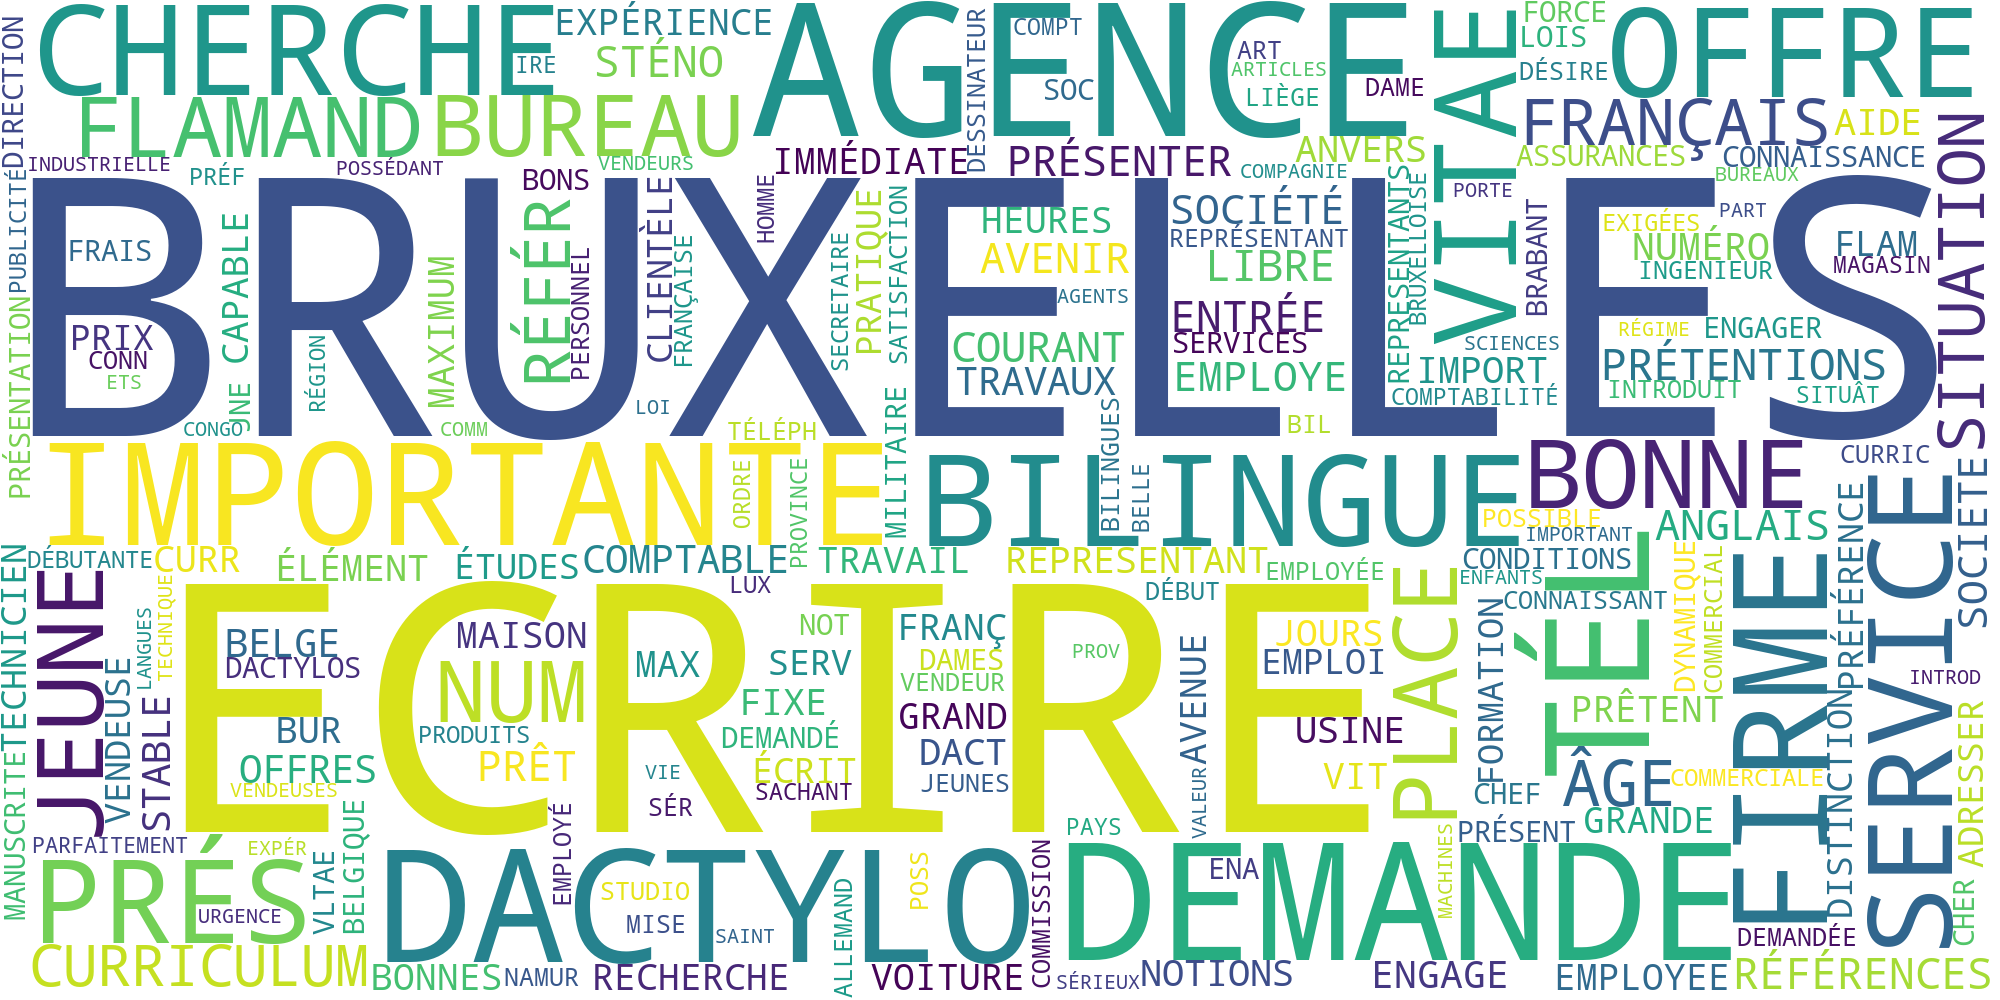

In [16]:
notre_nuage3 = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
notre_nuage3.to_file(os.path.join(path, f"{year1}.png"))
Image(filename=os.path.join(path, f"{year1}.png"))